<a href="https://colab.research.google.com/github/chacha715/ESAA/blob/main/%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04. 분류**

## **01. 분류(Classification)의 개요**

: 지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식. 지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것



---

## **02. 결정 트리**

*   결정 트리(Decision Tree)는 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것. 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것인데, 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함
*   규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값이며 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성됨. 하지만 많은 규칙이 있다는 것은 분류를 결정하는 방식이 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어지기 쉬움. 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
*   가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함. 이를 위해 트리를 어떻게 분할(Split)할 것인가가 중요한데 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요
*   결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦. 이러한 정보의 균일도를 측정하는 대표적인 방법이 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수. 결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할함
 *   엔트로피는 주어진 데이터 집합의 혼잡도를 의미. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 결정 트리는 정보 이득이 높은 속성을 기준으로 분할함
  *   지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수로, 0이 가장 평등하고 1로 갈수록 불평등함. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할함



### **결정 트리 모델의 특징**

*   결정 트리의 가장 큰 장점은 '균일도'라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적이라는 점. 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음. 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점
*   모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 더 많음에도 결정 트리는 학습 데이터 기반 모델의 정확도를 높이기 위해 계속해서 조건을 추가하면서 트리 깊이가 계속 커지고, 결과적으로 복잡한 학습 모델에 이르게 됨. 이는 결국 실제 상황(테스트 데이터 세트)에 유연하게 대처할 수 없어서 예측 성능이 떨어질 수밖에 없음. 차라리 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 됨



### **결정 트리 파라미터**

: 사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifer와 DecisionTreeRegressor 클래스를 제공. DecisionTreeClassifer는 분류를 위한 클래스이며, DecisionTreeRegressor는 회귀를 위한 클래스


### **결정 트리 모델의 시각화**

*   결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 Graphviz 패키지를 사용해 시각적으로 보여줄 수 있음. 사이킷런은 이러한 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API를 제공. 이는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌
*   더 이상 자식 노드가 없는 노드는 리프 노드. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드로, 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨. 자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음

 *   각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미하는데, 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미.

*   결정 트리는 과적합이 상당히 높은 ML 알고리즘으로, 결정 트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도
 *   결정 트리의 max_depth 하이퍼 파라미터를 변경하면 결정 트리의 최대 트리 깊이를 제어할 수 있음. min_samples_split 하이퍼 파라미터를 변경하면 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수가 변경됨. min_samples_leaf  하이퍼 파라미터를 변경하면 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정함. 리프 노드가 될 수 있는 조건은 디폴트로 1인데, min_samples_leaf 값을 키우면 더 이상 분할하지 않고, 리프 노드가 될 수 있는 조건이 완화됨

*   결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건임. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있기 때문인데, 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공함. feature_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨. 즉, 값이 높을수록 해당 피처의 중요도가 높다는 의미



### **결정 트리 과적합(Overfitting)**

: 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수를 제공함. 이 함수를 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트



### **결정 트리 실습 - 사용자 행동 인식 데이터 세트**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를  DataFrame으로 로드
feature_name_df=pd.read_csv('/content/drive/MyDrive/ESAA/DATA/human_activity/features.txt', sep='\s+', header=None,names=['column_index','column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

Mounted at /content/drive
전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
#중복된 피처명을 변경

feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
#중복된 피처명에 대해 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명 가지는 DataFrame 반환하는 함수인 get_new_feature_name_df() 생성
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0],axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)

  return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():
  #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv 에서 공백 문자를 sep으로 할당
  feature_name_df=pd.read_csv('/content/drive/MyDrive/ESAA/DATA/human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])

  #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df=get_new_feature_name_df(feature_name_df)
  
  #데이터프레임에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()

  #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train=pd.read_csv('/content/drive/MyDrive/ESAA/DATA/human_activity/train/X_train.txt',sep='\s+',names=feature_name)
  X_test=pd.read_csv('/content/drive/MyDrive/ESAA/DATA/human_activity/test/X_test.txt',sep='\s+',names=feature_name)

  #학습 레이블과 테스트 레이블 데이터를  DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train=pd.read_csv('/content/drive/MyDrive/ESAA/DATA/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
  y_test=pd.read_csv('/content/drive/MyDrive/ESAA/DATA/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
#사이킷런의 DecisionTreeClassfier 이용해 동작 예측 분류 수행

from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [ ]:
#GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능 확인

from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24]}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GrindSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GrindSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [ ]:
#max_depth의 증가에 따라 예측 성능이 어떻게 변했는지 확인
#cv_results_ 속성은 CV 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치

#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [ ]:
max_depths=[6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf=DecisionTreeClassifier(max_depth=depth,random_state=156)
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test,pred)
  print('max_depth={0} 정확도:{1:.4f}'.format(depth,accuracy))

max_depth=6 정확도:0.8558
max_depth=8 정확도:0.8707
max_depth=10 정확도:0.8673
max_depth=12 정확도:0.8646
max_depth=16 정확도:0.8575
max_depth=20 정확도:0.8548
max_depth=24 정확도:0.8548


In [ ]:
#max_depth와  min_samples_split을 같이 변경하면서 정확도 성능 튜닝
params={
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24],
}


grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
#GridSearchCV 객체인 grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습이 완료된 Estimator 객체
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


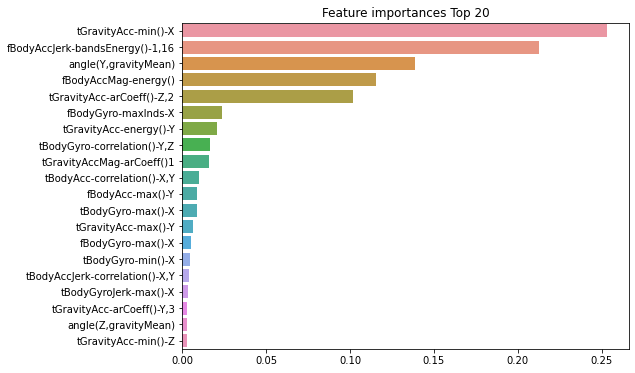

In [ ]:
#결정 트리에서 각 피처의 중요도를 feature_importances_속성을 이용해 알아보기
#중요도 높은 순으로 Top20 피처를 막대기로 표현

import seaborn as sns

frt_importances_values=best_df_clf.feature_importances_
#Top  중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 반환
frt_importances=pd.Series(frt_importances_values,index=X_train.columns)
#중요도 값 순으로 Series 를 정렬
ftr_top20=frt_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DeicisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz
#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,feature_names = iris_data.feature_names, impurity=True, filled=True)

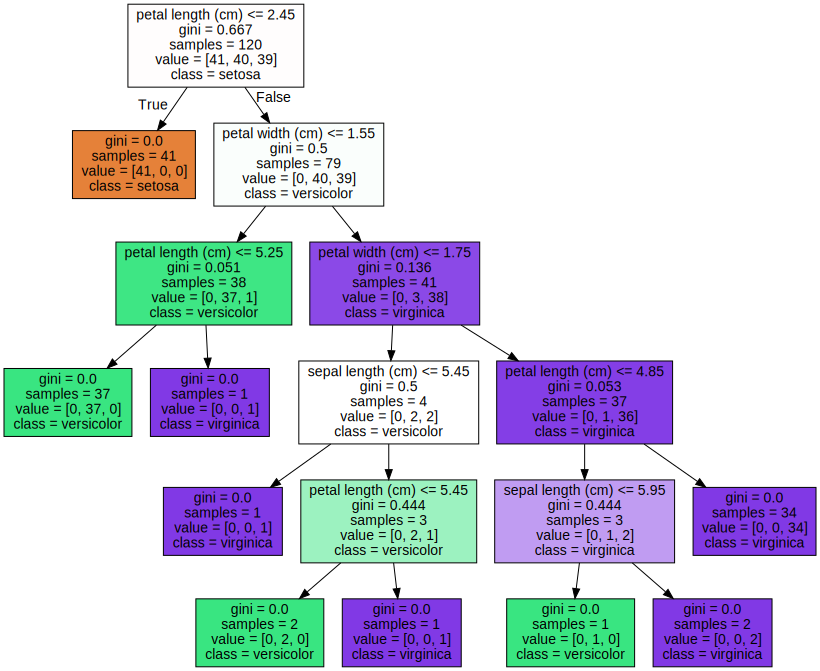

In [ ]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 기각화
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


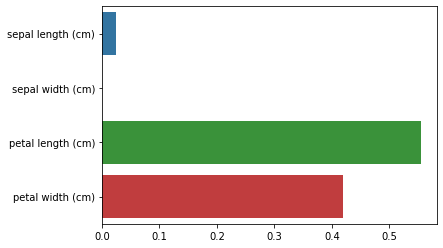

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

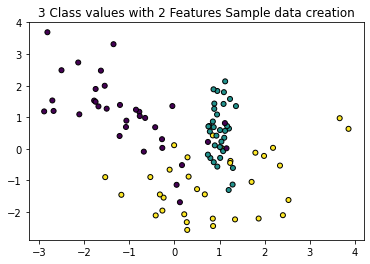

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features,y_labels=make_classification(n_features=2,n_redundant=0,n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

In [ ]:
#첫 번째 학습 시에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인
#이를 위해 별도의 함수인 visualize_boundary()를 생성. 이는 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트르 예측 분류하는지 잘 이해할 수 있게 해 줌

import numpy as np

# visualize_boundary() 함수
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

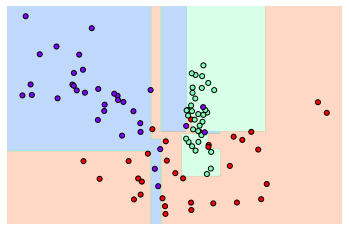

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 Decsion Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

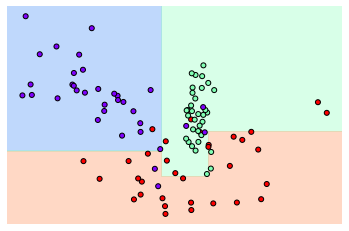

In [ ]:
#min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)



---

## **03. 앙상블 학습**


### **앙상블 학습 개요**


*   앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법. 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것
*   대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타냄. 앙상블 알고리즘의 대표격으로는 랜덤 포레스트와 그래디언트 부스팅 알고리즘이 있으며, '매력적인 솔루션'으로 불리는 XGBoost, 이와 유사한 예측 성능을 가지면서도 훨씬 빠른 수행 속도를 가진 LightGBM, 여러 가지 모델의 결과를 기반으로 메타 모델을 수립하는 스태킹(Stacking)을 포함해 다양한 유형이 있음
*   앙상블 학습의 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있으며, 이외에도 스태킹을 포함한 다양한 앙상블 방법이 있음. 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식으로, 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것. 대표적인 배깅 방식이 바로 랜덤 포레스트 알고리즘
 *   (예시) 보팅 분류기-선형 회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과로 보팅을 통해 최종 예측 결과를 선정
 *   배깅 분류기-단일 ML 알고리즘(결정 트리)으로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅 방식과는 다름. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑(Bootstrapping)  분할 방식이라고 부름. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 배깅 앙상블 방식. 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용함
 *   부스팅-여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것. 예측 성능이 뛰어나며, 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)이 있음



### **보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

*   하드 보팅-다수결 원칙과 비슷. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것
*   소프트 보팅-분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정. 일반적으로 소프트 보팅이 보팅 방법으로 적용됨



### **보팅 유형 분류기(Voting Classifier)**

*   사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공함. 이 클래스는 주요 생성 인자로 estimators와 voting 값을 입력받음. estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받으며 voting은 'hard'시 하드 보팅, 'soft'시 소프트 보팅 방식을 적용하라는 의미임(기본은 'hard")
*   데이터의 특성과 분포 등 다양한 요건에 따라 성능이 결정되고, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음. 그렇지만 보팅을 포함해 배깅과 부스팅 등의 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많음
*   ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 됨. 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요 과제로, 앙상블 학습에서는 결정 트리 알고리즘의 장점은 그래도 취하고 단점은 보완하면서 편향-분산 트레이드오프의 효과를 극대화할 수 있음




In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
#사이킷런은 load_breast_cancer() 함수를 통해 자체에서 위스콘신 유방암 데이터 세트를 생성할 수 있음
#로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들기

# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386




---

## **04. 랜덤 포레스트**

### **랜덤 포레스트의 개요 및 실습**

*   배깅(Bagging)은 보팅과는 다르게, 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘이며 대표적인 알고리즘은 랜덤 포레스트임. 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보임
*   랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음. 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정함. 랜덤 포레스트는 부트스트래핑 분할 방식을 이용하며, 서브세트(Subset) 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩되어 만들어짐
*   사이킷런은 RandomForestClassifer 클래스를 통해 랜덤 포레스트 기반의 분류를 지원함



### **랜덤 포레스트 하이퍼 파라미터 및 튜닝**

*   트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝을 위한 시간이 많이 소모됨에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않다는 것
*   GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝. 랜덤 포레스트는 CPU 병렬 처리도 효과적으로 수행되어 빠른 학습이 가능하기에 그래디언트 부스팅보다 예측 성능이 약간 떨어지더라도 랜덤 포레스트로 일단 기반 모델을 먼저 구축하는 경우가 많음




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


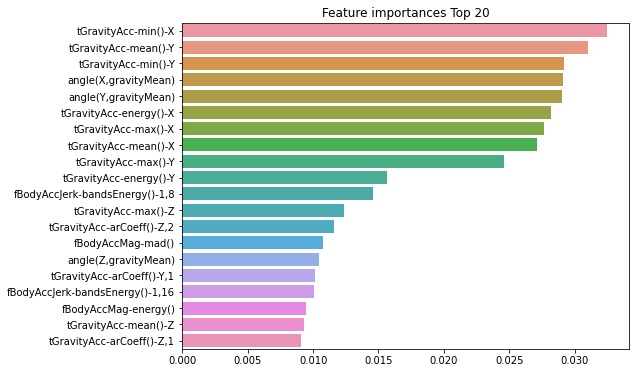

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()



---

## **05.GBM(Gradient Boosting Machine)**

### **GBM의 개요 및 실습**

*   부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식. 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트
 *   에이다 부스트(AdaBoost)-오류 데이터에 가중치를 부여하며 부스팅을 수행하는 대표적인 알고리즘
 *   GBM(Gradient Boost Machine)도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이. '반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법'
*   GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류는 물론이고, 회귀도 가능함. 사이킷런은 GBM 기반의 분류를 위해 GradientBoostingClassifier 클래스를 제공함
*   그렇지 않은 경우도 있겠지만, 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많음. 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요함. 사이킷런의 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원되지 않아 대용량 데이터이 경우 학습에 매우 많은 시간이 필요함



### **GBM 하이퍼 파라미터 및 튜닝**

:  GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘이지만 수행 시간이 오래 걸린다는 단점이 있음

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))


---

## **06.XGBoost(eXtra Gradient Boost)**

*  트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나. GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결해서 매우 각광을 받고 있음. 자체 내장된 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능과 걸손값을 자체 처리할 수 있는 기능을 가지고 있음.
*   XGBoost 패키지의 사이킷런 래퍼 클래스는 XGBClassifier와 XGBrRegressor. 이를 이용하면 사이킷런 estimator가 학습을 위해 사용하는 fit()과 predict()와 같은 표준 사이킷런 개발 프로세스 및 다양한 유틸리티를 활용 가능.
*   초기의 독자적인 XGBoost 프레임워크 기반의 XGBoost를 **파이썬 래퍼 XGBoost 모듈**, 사이킷런과 연동되는 모듈을 **사이킷런 래퍼 XGBoost 모듈**이라고 지칭


### **XGBoost 개요**
: 파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼 파라미터는 약간 다르므로 이에 대한 주의가 필요. 사이킷 파라미터의 범용화된 이름 규칙(Naming Rule)에 따라 파라미터 명이 달라짐.


### **XGBoost 설치하기**

### **파이썬 래퍼 XGBoost 하이퍼 파라미터**

*  **주요 일반 파라미터** : 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로, 디폴트 파라미터 값을 바꾸는 경우는 거의 없음

 *   booster : gbtree(tree based model)-디폴트- 또는 gbliner(linear model) 선택
 *   silent : 디폴트는 0, 출력 메시지를 나타내고 싶지 않은 경우 1
 *   nthread : CPU의 실행 스레드 개수 조정


*  **주요 부스터 파라미터** : 트리 최적화, 부스팅, regularization 관련 파라미터

 *   eta[dafault =0.3, alias : learning_rate] : GBM의 학습률(learning rate)과 같은 파라미터. 0에서 1 사이의 값을 조정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트 됨. 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, 디폴트는 0.1
 *   num_boost_rounds : GBM의 n_estimator와 같은 파라미터
 *   min_child_weight[default=1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합으로, 클수록 분할을 자제함. 과적합 조절하기 위해 사용
 *   gamma[default=0, alias:min_split_loss] : 트리의 리프 노드를 추가적을 나눌 지를 결정할 최소 손실 감소 값으로, 클수록 과적합 감소 효과가 있음
 *   max_depth[default=6] : 트리 기반 알고리즘의 max_depth와 같으며, 0을 지정하면 깊이에 제한이 없음. 높을수록 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용
 *   sub_sample[default=1] : GBM의 subsample과 동일하며 일반적으로 0.5~1 사이의 값을 사용
 *   colsample_bytree[default=1] : GBM의 max_features와 유사하며 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용함
 *   lambda[default=,alias:reg_lambda]` : L2 Regularization 적용 값으로 클수록 과적합 감소 효과가 있음
 *   alpha[default = 0, alias : reg_alpha] : L1 Regularization 적용 값으로 클수록 과적합 감소 효과가 있음
 *   scale_pos_weight[default=1] : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터


*  **학습 태스크 파라미터** : 학습 수행시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

 *   objective : 최솟값을 가져야할 손실함수 정의
 *   binary:logistic : 이진 분류일 때 적용
 *   multi:softmax : 다중 분류일 때 적용, 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 함
 *   multi:softprob : multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환
 *   eval_metric : 검증에 사용되는 함수 정의, 기본값은 회귀인 경우 rmse, 분류일 경우 error

*  과적합 문제가 심각할 때 적용할 옵션

 *   eta값을 낮춰주고, num_round(n_estimators)는 높여줌
 *   max_depth 값을 낮춰줌
 *   min_child_weight 값을 높임
 *   gamma 값을 높임
 *   subsample과 colsample_bytree 조정 

*   XGBoost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화(plotting) 기능을 가지고 있음. 그중 대표적인 기능이 조기 중단(Early Stopping) 기능

### **파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

*   종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성종양(malignant)인지 일반 양성종양(benign)인지를 XGBoost를 이용해 예측. xgboost 패키지는 피처의 중요도를 시각화해주는 모듈인 plot_importance를 함께 제공
*   파이썬 래퍼 XGBoost는 사이킷런과 차이가 여러 가지 있지만, 먼저 눈에 띄는 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성한다는 점. DMatrix는 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트로, 주요 입력 파라미터는 피처 데이터 세트인 data와 분류의 경우 레이블 데이터 세트, 회귀의 경우 숫자형인 종속값 데이터 세트인label. 판다스의 DataFrame으로 데이터 인터페이스를 하기 위해서는 DataFrame.values를 이용해 넘파이로 일차 변환한 뒤에 이를 이용해 DMatrix 변환을 적용
*   XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력, 조기 중단은 train() 함수에 early_stopping_rounds 파라미터를 입력하여 설정. 이를 위해서는 반드시 eval_set과 eval_metric이 함께 설정돼야 함. XGBoost는 반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정함. 조기 중단을 수행하려면 반드시 evals 파라미터에 eval 데이터 세트를 명기해줘야 함. train()은 학습이 완료된 모델 객체를 반환함
 *   eval_set은 성능 평가를 수행할 평가용 데이터 세트를 설정
 *   eval_metric은 평가 세트에 적용할 성능 평가 방법. 분류일 경우 주로 'error'(분류 오류), 'logloss'를 적용

### **사이킷런 래퍼 XGBoost의 개요 및 적용**

In [19]:
import xgboost as xgb
from xgboost import XGBClassifier

In [21]:
import xgboost
print(xgboost.__version__)

0.90


In [22]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3) #타깃 레이블 값의 종류는 악성인 'malignant'가 0 값으로, 양성인 'benign'이 1값으로 되어 있음

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
#레이블 값의 분포 확인

print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [23]:
#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size = 0.2, random_state = 156)
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [6]:
dtrain = xgb.DMatrix(data=X_train,label = y_train)
dtest = xgb.DMatrix(data=X_test,label = y_test)

In [24]:
params = {
    'max_depth' :3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400

In [25]:
#train데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist=[(dtrain,'train'),(dtest,'eval')]
#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=num_rounds, early_stopping_rounds=100,evals=wlist)

#train()으로 학습 수행하면서 반복 시 train-error와 eval-logloss가 지속적으로 감소

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

In [26]:
#xgboost이용해 모델의 학습이 완료됐으면 이를 이용해 테스트 데이터 세트에 예측을 수행
#xgboost의 predict는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환
#사이킷런의 predict는 예측 결과 클래스값 (0,1) 반환

pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 활률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [28]:
def get_clf_eval(y_test, pred=None, pred_proba=None): #평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  #ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [29]:
get_clf_eval(y_test,preds,pred_probs)

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율:0.9870, F1 : 0.9806, AUC : 0.9951


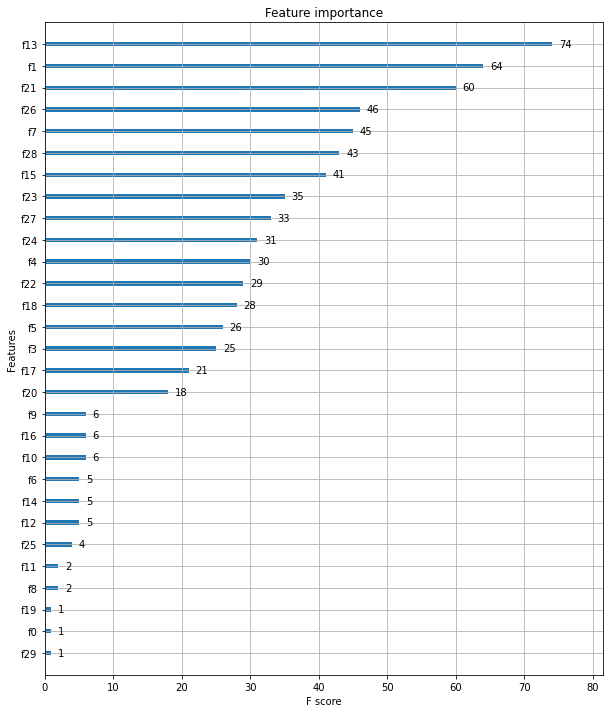

In [30]:
#xgboost 패키지 내장된 시각화 기능 수행
#xgboost의 plot_importance() API는 피처의 중요도를 막대그래프 형식으로 나타냄. 기본 평가 지표로 f1 스코어를 기반으로 해 각 피처의 중요도를 나타냄
#plot_importance() 호출 시 파라미터로 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체를 입력
#유의할 점은 학습 시에 피처명을 제대로 알 수가 없으므로 피처 순서별로 f 뒤에 순서를 붙여서 X 축에 피처들로 나열함

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

In [31]:
#파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공
#xgv.cv의 반환값은 DataFrame 형태

xgboost.cv(params,dtrain,num_boost_round=10,nfold=3,stratified=False,metrics=(),obj=None,feval=None,maximize=False,early_stopping_rounds=None,fpreproc=None,as_pandas=True,verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.610037,0.000064,0.617447,0.004961
1,0.541817,0.000202,0.555140,0.008989
2,0.483717,0.000955,0.503529,0.012238
3,0.434676,0.001311,0.459869,0.015795
4,0.392310,0.001686,0.423058,0.016788
5,0.355129,0.001390,0.391187,0.019785
6,0.322530,0.001908,0.361119,0.019378
7,0.294159,0.001618,0.337140,0.021086
8,0.269083,0.002068,0.314903,0.019972
9,0.246208,0.001940,0.295012,0.019237


In [32]:
##마지막 부분 필기 안함!
#위스콘신 대학병원의 유방암 데이터 세트를 분류하기 위해 XGBClassifier 이용
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
w_preds=xgb_wrapper.predict(X_test)
w_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,w_preds,w_preds_proba)

#결과 이전과 동일
#사이킷런 래퍼도 조기중단 수행 가능, 조기중단 관련 파라미터 fit()에 입력
#조기중단 평가 지표:eval_metric, 성능평가 수해이 eval_set

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율:0.9870, F1 : 0.9806, AUC : 0.9951


In [33]:
#별도의 테스트 데이터 세트 설정하여 수행

from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)

evals=[(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)

ws100_preds=xgb_wrapper.predict(X_test)
ws100_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

#311번 반복한 후 학습완료
#211번 부터 성능 평가 지수 향상되지 않아 반복하지 않고 멈춤

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [34]:
#조기중단으로 학습된 XGBClassifier의 예측 성능을 살펴보기
#조기중단이 적용되지 않은 결과보다 약간 저조한 성능을 나타냈지만, 큰 차이는 아님
get_clf_eval(y_test,ws100_preds,ws100_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.9620, 재현율:0.9870, F1 : 0.9744, AUC : 0.9954


In [35]:
#10으로 설정해보기-아직 향상될 여지 있어 충분한 학습되지 않아 예측 성능 나빠질 수 있다

xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=evals,verbose=True)

ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,ws10_preds,ws10_pred_proba)

#아까 0.9649였는데 0.9561로 감소

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


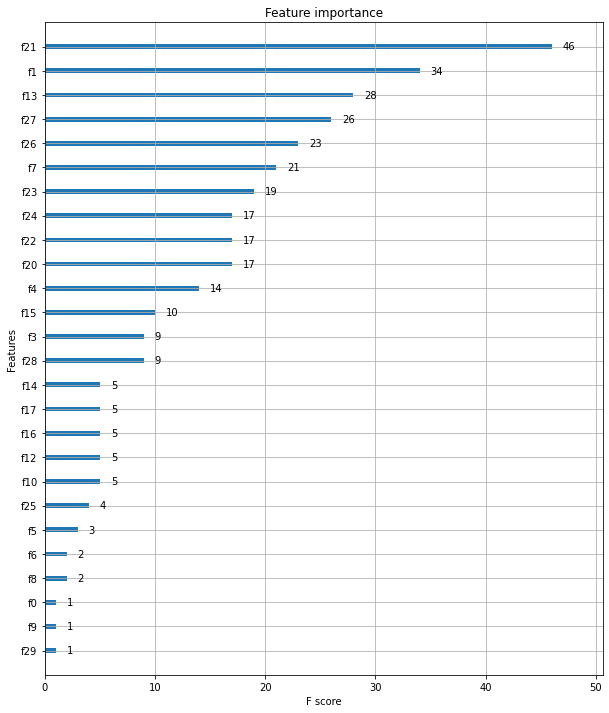

In [36]:
#피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper,ax=ax)